# Computer Lab: Digit recognition
## SD-TSIA 

Bruno Pons

In [1]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

5


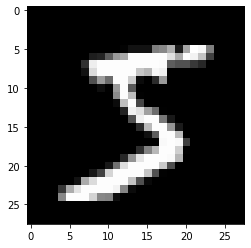

In [2]:

train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')



## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

initial_weight = model.trainable_weights.copy()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## 4 Model

Question 4.1

The number of optimization variables that we are going to train using this model are 785\*32 + 33\*32 + 33\*10 = 26506

## Questions 5 and 6:

In [4]:
def random_batch(x_train, y_train, batch_size=1):
      n = x_train.shape[0]
      idx = np.arange(n)
      np.random.shuffle(idx)
      list_batch = []
      for k in range( n // batch_size ):
              index_batch = idx[k*batch_size: (k+1)*batch_size]
              list_batch.append((x_train[index_batch],y_train[index_batch]))
      return list_batch

In [5]:


def sgd(model, x_train, y_train, batch_size=1, step=0.1, n_epochs=1):
      batch_list = random_batch(x_train, y_train, batch_size)
      grad_iter = 0
      obj_val = []
      for k in range(n_epochs):
      
            for i in tqdm(range(len(batch_list))):
                    x_train_batch, y_train_batch = batch_list[i]
                    stepi = (step/np.sqrt(i+1))*(1/batch_size)
                    with tf.GradientTape() as tape:
                            # Run the forward pass of the layer.
                            # The operations that the layer applies
                            # to its inputs are going to be recorded
                            # on the GradientTape.
                            logits = model(x_train_batch)  # Logits for this minibatch

                            # Compute the loss value for this minibatch.
                            loss_value = loss(y_train_batch, logits)

                    # Use the gradient tape to automatically retrieve
                    # the gradients of the trainable variables with respect to the loss.
                    grad = tape.gradient(loss_value, model.trainable_weights)
                    
                    ## Evaluate model
                    samples_for_evaluation = np.random.randint(0, 10000, 1000)
                    logits = model(x_train[samples_for_evaluation])
                    obj = loss(y_train[samples_for_evaluation], logits).numpy()


                    obj_val.append(obj)
                    update = [ -stepi*g  for g in grad ]
                    update_weights(model,update)
                    grad_iter += 1

      
      fig, ax = plt.subplots()
      plt.plot(np.arange(grad_iter), obj_val , color="r", label= "My ridge")
      plt.xlabel("Iteration")
      plt.ylabel("Objective value")
      ax.legend()
      plt.title("Objecive value in function of iteration")
      plt.grid()
      plt.show()

  0%|          | 0/60000 [00:00<?, ?it/s]

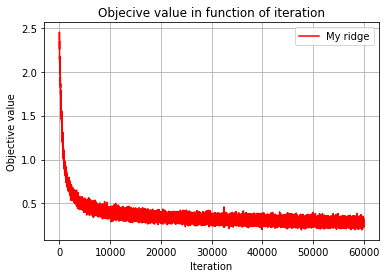

In [6]:
model.set_weights(initial_weight)

sgd(model, x_train, y_train)

## Question 7

In [7]:
logits = model(x_train)
acc_train = loss(y_train, logits).numpy()

logits = model(x_test)
acc_test = loss(y_test, logits).numpy()

print("Accuracy for train data: ", acc_train, "Accuracy for test data: ", acc_test)

Accuracy for train data:  0.2857701 Accuracy for test data:  0.27604917
